# HT 8. RNA

## Miembros
- Fabian Estuardo Juarez Tello 21440
- Diego Estuardo Lemus Lopez 21469

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FabianJuarez182/MD-HT8.git)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


## Análisis exploratorio de los datos

In [2]:
datos = pd.read_csv('train.csv')
datos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
le = LabelEncoder()
datos["MSZoning"] = le.fit_transform(datos["MSZoning"])
datos["Street"] = le.fit_transform(datos["Street"])
datos["Alley"] = le.fit_transform(datos["Alley"])
datos["LotShape"] = le.fit_transform(datos["LotShape"])
datos["LandContour"] = le.fit_transform(datos["LandContour"])
datos["Utilities"] = le.fit_transform(datos["Utilities"])
datos["LotConfig"] = le.fit_transform(datos["LotConfig"])
datos["LandSlope"] = datos["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
datos["Neighborhood"] = le.fit_transform(datos["Neighborhood"])
datos["Condition1"] = le.fit_transform(datos["Condition1"])
datos["Condition2"] = le.fit_transform(datos["Condition2"])
datos["BldgType"] = le.fit_transform(datos["BldgType"])
datos["HouseStyle"] = le.fit_transform(datos["HouseStyle"])
datos["RoofStyle"] = le.fit_transform(datos["RoofStyle"])
datos["RoofMatl"] = le.fit_transform(datos["RoofMatl"])
datos["Exterior1st"] = le.fit_transform(datos["Exterior1st"])
datos["Exterior2nd"] = le.fit_transform(datos["Exterior2nd"])
datos["MasVnrType"] = le.fit_transform(datos["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
datos["ExterQual"] = datos["ExterQual"].map(condition_map)
datos["ExterCond"] = datos["ExterCond"].map(condition_map)
datos["Foundation"] = le.fit_transform(datos["Foundation"])
datos["BsmtQual"] = datos["BsmtQual"].map(condition_map)
datos["BsmtCond"] = datos["BsmtCond"].map(condition_map)
datos["BsmtExposure"] = datos["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
datos["BsmtFinType1"] = datos["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["BsmtFinType2"] = datos["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["Heating"] = le.fit_transform(datos["Heating"])
datos["HeatingQC"] = datos["HeatingQC"].map(condition_map)
datos["CentralAir"] = le.fit_transform(datos["CentralAir"])
datos["Electrical"] = datos["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
datos["KitchenQual"] = datos["KitchenQual"].map(condition_map)
datos["Functional"] = le.fit_transform(datos["Functional"])
datos["FireplaceQu"] = datos["FireplaceQu"].map(condition_map)
datos["GarageType"] = le.fit_transform(datos["GarageType"])
datos["GarageFinish"] = datos["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["GarageQual"] = datos["GarageQual"].map(condition_map)
datos["GarageCond"] = datos["GarageCond"].map(condition_map)
datos["PavedDrive"] = datos["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
datos["PoolQC"] = datos["PoolQC"].map(condition_map)
datos["Fence"] = datos["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
datos["MiscFeature"] = le.fit_transform(datos["MiscFeature"])
datos["SaleType"] = le.fit_transform(datos["SaleType"])
datos["SaleCondition"] = le.fit_transform(datos["SaleCondition"])


In [4]:
columns_with_na = datos.isna().any()
# Recorrer todas las columnas y rellenar con 0 donde sea necesario
for column in columns_with_na.index:
    if columns_with_na[column]:
        datos[column] = datos[column].fillna(0)

In [5]:
# Definir los límites de las categorías basadas en los percentiles
bins = datos['SalePrice'].quantile([0, 0.33, 0.66, 1]).values

# Crear las categorías
datos['CategoriaPrecio'] = pd.cut(datos['SalePrice'], bins, labels=['Bajo', 'Medio', 'Alto'], include_lowest=True)


### Inciso 3 y 4

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Preparación de datos
X = datos.drop(['SalePrice', 'CategoriaPrecio'], axis=1)
y = datos['CategoriaPrecio']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Modelo 1: 3 capas ocultas con activaciones ReLU y Softmax en la salida
model1 = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Modelo 2: 4 capas ocultas con activaciones ReLU, tanh y Softmax en la salida
model2 = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='tanh'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3899 - loss: 167.4251
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5608 - loss: 37.2074
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5897 - loss: 29.0377
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - loss: 15.6336
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6184 - loss: 34.9499
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6187 - loss: 23.1525
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - loss: 12.8319
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6559 - loss: 14.8950
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6802 - loss: 12.5921
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6946 - loss: 10.4214
Epoch 1/10


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3433 - loss: 1.1296
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4152 - loss: 1.0811
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3854 - loss: 1.0733
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4256 - loss: 1.0742
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3507 - loss: 1.0857
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4113 - loss: 1.0747
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3748 - loss: 1.0731
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3792 - loss: 1.0785
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3863 - loss: 1.0852
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3668 - loss: 1.0946


In [7]:
# Predicciones
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)

# Convertir las predicciones de probabilidades a etiquetas
predicted_labels1 = np.argmax(predictions1, axis=1)
predicted_labels2 = np.argmax(predictions2, axis=1)



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


### Inciso 5

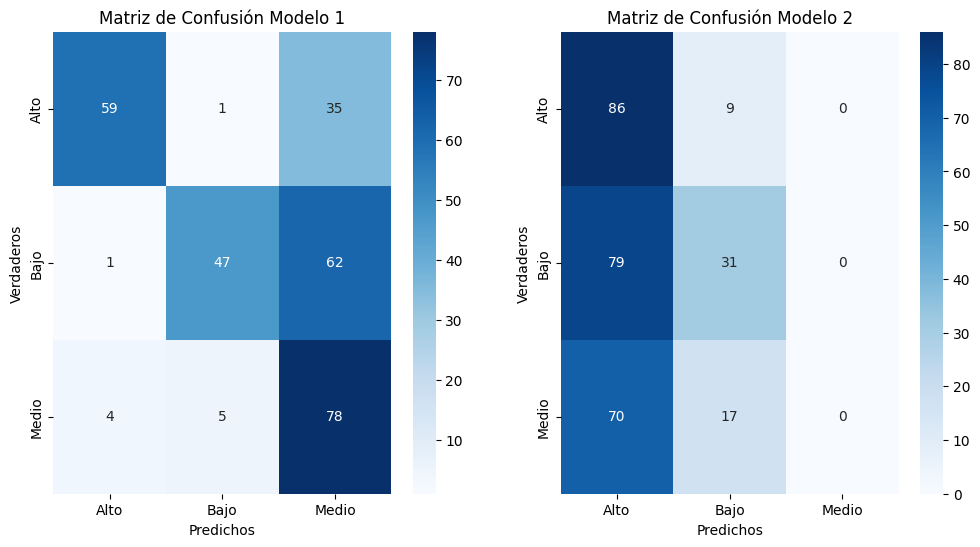

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrices de confusión
cm1 = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels1)
cm2 = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels2)

# Visualización con Seaborn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión Modelo 1')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión Modelo 2')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')

plt.show()


### Inciso 6

- Efectividad

Modelo 1: Comienza con una precisión del 32.9% y termina con 68.35% después de 10 épocas, mostrando un crecimiento sostenido en la precisión

Modelo 2: Inicia con una precisión del 32.39% y termina con 37.68%, sin mostrar una tendencia de mejora clara y teniendo fluctuaciones en la precisión durante las épocas.


- Tiempo de procesamiento

Modelo 1: Aproximadamente entre 2 y 4 milisegundos por paso, con una tendencia a disminuir con el tiempo.

Modelo 2: También entre 2 y 6 milisegundos por paso, pero sin una tendencia clara de disminución o incremento en el tiempo.


- Equivocaciones

Modelo 1: Tiene más dificultades para clasificar correctamente la clase "Medio". Sin embargo, parece manejar bien las clases "Alto" y "Bajo"

Modelo 2: Muestra una mejora significativa en la clasificación de la clase "Alto", pero a costa de un peor desempeño en las otras dos clases, especialmente "Medio", donde todas las predicciones son incorrectas.

La importancia dependerá del contexto, dado que para esta hoja de trabajo se busca no confundir "Alto" con "Medio", por ejemplo, entonces el Modelo 2 no es del todo preferible por su menor precisión general. Si la distribución balanceada de errores es más crítica, el Modelo 1 es mejor.


- Conclusión

El Modelo 1 parece ser más efectivo en términos de precisión y aprendizaje a lo largo del tiempo. El Modelo 2 podría ser preferible si la clasificación correcta de la clase "Alto" es de mayor importancia sobre las otras clases y se está dispuesto a sacrificar precisión general y equilibrio en el desempeño entre clases. Por último, los tiempos de procesamiento no parecen ser una diferencia significativa entre los dos modelos.

### Inciso 7

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6350 - loss: 19.2300 - val_accuracy: 0.7479 - val_loss: 8.2291
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6797 - loss: 12.6326 - val_accuracy: 0.7179 - val_loss: 10.5669
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7235 - loss: 10.5711 - val_accuracy: 0.7137 - val_loss: 11.5055
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6603 - loss: 13.0285 - val_accuracy: 0.6197 - val_loss: 16.4190
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6972 - loss: 14.3456 - val_accuracy: 0.6154 - val_loss: 20.7693
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6413 - loss: 13.9046 - val_accuracy: 0.5556 - val_loss: 17.0686
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3746 - loss: 1.1156 - val_accuracy: 0.4316 - val_loss: 1.0551
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4264 - loss: 1.0473 - val_accuracy: 0.431

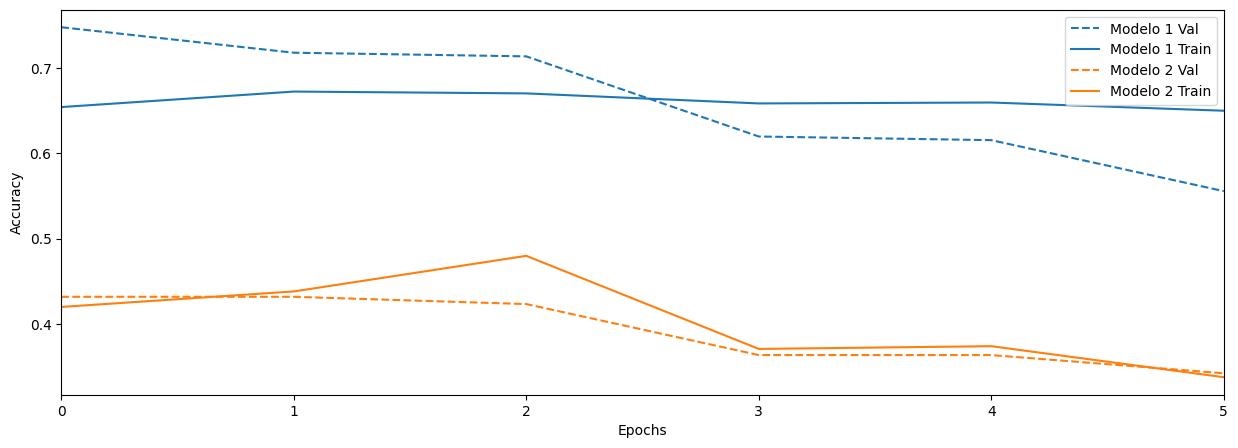

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback para detener el entrenamiento si la validación no mejora
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento con datos de validación para monitoreo de sobreajuste
history1 = model1.fit(
    X_train, 
    y_train, 
    epochs=50,  # Más épocas para ver el efecto a largo plazo
    batch_size=32, 
    verbose=1, 
    validation_split=0.2,  # 20% de los datos para validación
    callbacks=[early_stopping]
)

history2 = model2.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=32, 
    verbose=1, 
    validation_split=0.2, 
    callbacks=[early_stopping]
)

# Gráficas de precisión y pérdida de entrenamiento vs. validación
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(15, 5))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

# Usar esta función para graficar
plot_history([('modelo 1', history1), ('modelo 2', history2)])

plt.show()


Sí hay sobreajuste en los modelos, parece que hay señales de sobreajuste en ambos modelos, especialmente notables en el Modelo 1. Se puede observar esto en las gráficas de precisión y pérdida de entrenamiento vs. validación, así como en los valores de precisión y pérdida durante el entrenamiento y la validación.

Modelo 1: En la gráfica, se puede ver que la precisión en los datos de entrenamiento sigue aumentando, pero la precisión en los datos de validación se estanca o incluso disminuye después de un cierto número de épocas.

Modelo 2: También muestra signos de sobreajuste, aunque no tan pronunciados como el Modelo 1. En la gráfica, la brecha entre la precisión de entrenamiento y la precisión de validación es menor que en el Modelo 1, pero aún se observa que la precisión de validación se estanca o disminuye después de un cierto número de épocas.

### Inciso 8

In [22]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV

# Función para crear el modelo (necesaria para KerasClassifier)
def create_model(layers, activation):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Uso de la capa Input
    for layer in layers:
        model.add(Dense(layer, activation=activation))
    model.add(Dense(3, activation='softmax'))  # Asumiendo 3 categorías
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap del modelo para uso en scikit-learn
model = KerasClassifier(model=create_model, verbose=0)

# Diccionario de parámetros para GridSearch
param_grid = {
    'model__layers': [[50], [50, 20]],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [32],
    'epochs': [30]
}

# Creación de GridSearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Ejecutar búsqueda de parámetros
grid_result = grid.fit(X_train, y_train)

# Resultados
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor: 0.673779 usando {'batch_size': 32, 'epochs': 30, 'model__activation': 'relu', 'model__layers': [50, 20]}


### Inciso 9

In [25]:
X = datos.drop('SalePrice', axis=1)  # todas las características excepto SalesPrice
y = datos['SalePrice']  # SalesPrice como la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Inciso 10

In [30]:
from keras.models import Sequential
from keras.layers import Dense

# Convertir cualquier dato categórico a numérico, ejemplo con pandas.get_dummies()
X_train = pd.get_dummies(X_train)

X_train.fillna(X_train.mean(), inplace=True)  # Rellenar valores nulos con la media
y_train.fillna(y_train.mean(), inplace=True)  # Asumiendo que y_train es una Serie

# Modelo de regresión 1
model1 = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
model1.compile(optimizer='adam', loss='mean_squared_error')

# Modelo de regresión 2
model2 = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(1)
])
model2.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento de los modelos
history1 = model1.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 37366976512.0000 - val_loss: 32063264768.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29240039424.0000 - val_loss: 17654007808.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13562679296.0000 - val_loss: 4428518912.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6553722368.0000 - val_loss: 3518848768.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5616383488.0000 - val_loss: 3101500416.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7371759104.0000 - val_loss: 2827081216.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5277487104.0000 - val_loss: 2687962368.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3913093376.0000 - val_loss: 2608146176.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3973552384.0000 - val_loss: 2526929408.0000
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3717677824.0000 - va

### Inciso 11

Entre los dos modelos de redes neuronales RNA que utilizan las funciones de activación ReLU y Tanh para predecir el precio de las casas, se puede observar una clara diferencia en su desempeño a través de las Métricas de Error Cuadrático Medio (MSE). El modelo con activación ReLU presenta un MSE de 1,594,851,968, lo cual es significativamente más bajo que el MSE de 39,406,837,760 obtenido por el modelo con activación Tanh.

En conclusión, podemos afirmar que el modelo de RNA con activación ReLU es claramente superior al modelo con activación Tanh para la tarea de predecir el precio de las casas. Esto sugiere que ReLU, al ser una función de activación que permite una mejor propagación del gradiente, especialmente en redes profundas, es más efectiva para este tipo de regresión en comparación con Tanh.

### Inciso 12

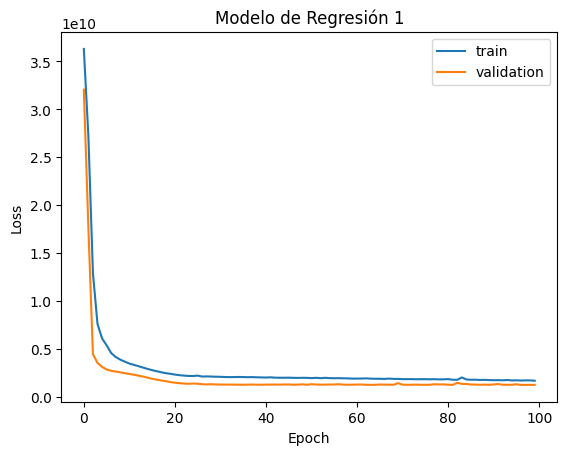

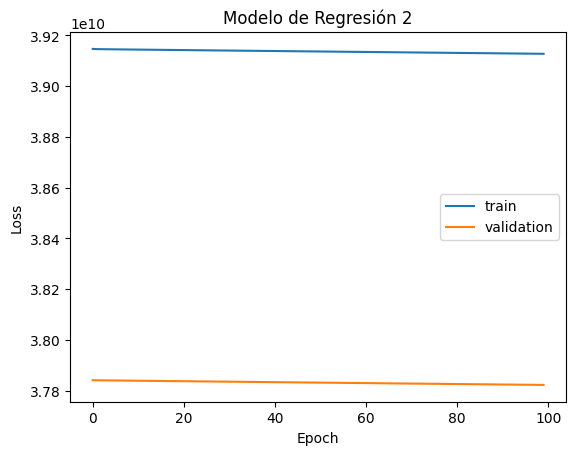

In [31]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, title):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_learning_curves(history1, 'Modelo de Regresión 1')
plot_learning_curves(history2, 'Modelo de Regresión 2')